## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [11] : [Algoritma Densitas dan Asosiasi] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Steven Indriano"
myNIM = "57217"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Steven Indriano
NIM: 		57217
Start: 		2023-11-15 18:27:14.439496
Device ID: 	ed0664d2-83a9-11ee-9d8b-f057a69a9c86



---

### Dataset yang dipakai:

1. [US Census Demographic Data] – sumber : [https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data]
2. [Customer Shopping Trends Dataset] – sumber : [https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset]

### Hasil kerja

In [2]:
# Your codes are here (replace the following codes)
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN

In [4]:
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3),
               x_off=(0, 50), y_off=(0, 50)):
    
    clusters_x = []
    clusters_y = []
    
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
    
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
        
    return clusters_x, clusters_y

In [5]:
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)

In [6]:
data = np.float32((np.concatenate(clusters_x),
                  np.concatenate(clusters_y))).transpose()

In [7]:
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)

In [8]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [9]:
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

Text(0.5, 1.0, 'Original Data')

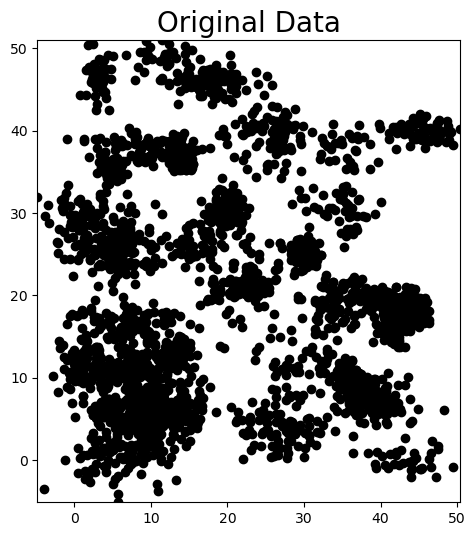

In [10]:
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(data[:, 0], data[:, 1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

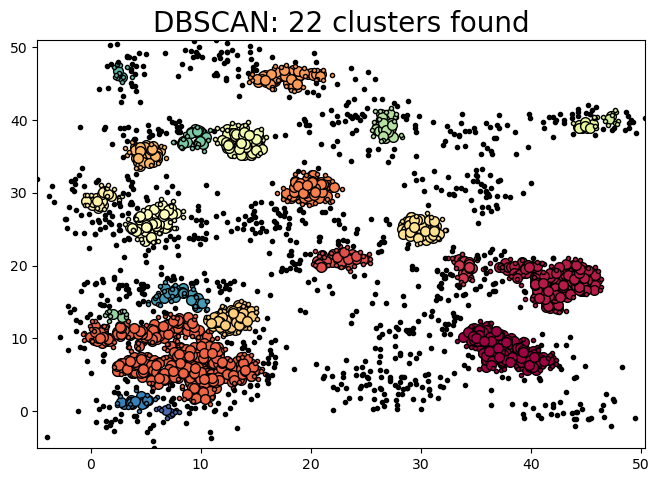

In [11]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=7)
    
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=3)
    
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize=20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

In [12]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
df = pd.read_csv('C://Users//NB//.vscode//Machine Learning//Week 11//Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

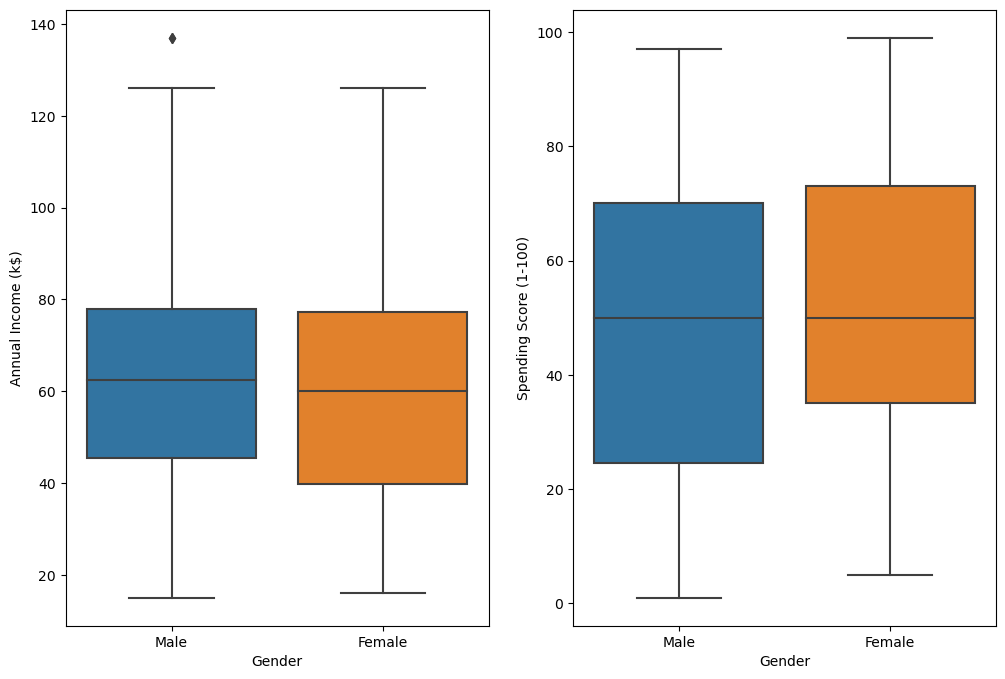

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, orient='v', ax=axes[0])
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, orient='v', ax=axes[1])

In [17]:
df_group_one = df[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_group_one.groupby(['Gender'],as_index=False).mean()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


In [18]:
df_female = df[df['Gender'] == "Female"]
print(df_female.shape)
df_female.head()

(112, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [19]:
Percentage = (df_female.shape[0]/df.shape[0])*100
print('Female Percentage: ', round(Percentage), '%')

Female Percentage:  56 %


In [25]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Club_dataSet = df_female[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
Club_dataSet = np.nan_to_num(Clus_dataSet)
Club_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Club_dataSet = StandardScaler().fit_transform(Clus_dataSet)

#Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_female['Club_Db']=labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

print(df_female[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Clus_Db']].head())
print("number of labels: ", set(labels))

   Age  Annual Income (k$)  Spending Score (1-100)  Clus_Db
2   20                  16                       6       -1
3   23                  16                      77        0
4   31                  17                      40       -1
5   22                  17                      76        0
6   35                  18                       6       -1
number of labels:  {0, 1, 2, 3, -1}


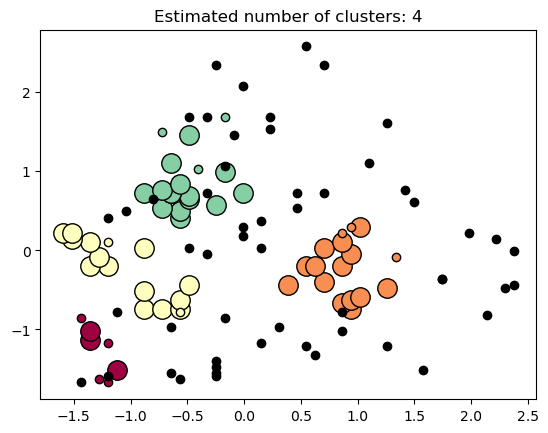

number of noise(s):  54


In [29]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise = list(labels).count(-1)
print('number of noise(s): ', n_noise)


In [30]:
for clust_number in set(labels):
    clust_set = df_female[df_female.Clus_Db == clust_number]
    if clust_number != -1:
        print("Cluster "+str(clust_number)+', Avg Age:'+ str(round(np.mean(clust_set.Age)))+\
             ', Avg Income: '+ str(round(np.mean(clust_set['Annual Income (k$)'])))+\
             ', AvgSpending: '+ str(round(np.mean(clust_set['Spending Score (1-100)'])))+\
             ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age:22, Avg Income: 26, AvgSpending: 78, Count: 7
Cluster 1, Avg Age:49, Avg Income: 54, AvgSpending: 50, Count: 17
Cluster 2, Avg Age:25, Avg Income: 52, AvgSpending: 50, Count: 16
Cluster 3, Avg Age:32, Avg Income: 82, AvgSpending: 82, Count: 18


In [31]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\NB\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [32]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
          ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
          ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
          ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
          ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [34]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [35]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.6)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


In [37]:
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [38]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Kidney Beans, Eggs)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Kidney Beans, Yogurt)",2


In [39]:
frequent_itemsets[ (frequent_itemsets['length'] ==2) &
                 (frequent_itemsets['support'] >= 0.8)]

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2


In [40]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]

,support,itemsets,length
6,0.6,"(Eggs, Onion)",2


In [41]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df, min_support=0.6)

,support,itemsets
0,1.0,(5)
1,0.8,(3)
2,0.6,(10)
3,0.6,(8)
4,0.6,(6)
5,0.8,"(3, 5)"
6,0.6,"(10, 5)"
7,0.6,"(8, 3)"
8,0.6,"(8, 5)"
9,0.6,"(8, 3, 5)"


In [42]:
fpgrowth(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Kidney Beans, Yogurt)"
7,0.6,"(Eggs, Onion)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Eggs, Onion)"


In [44]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [45]:
from mlxtend.frequent_patterns import apriori

%timeit -n 100 -r 10 apriori(df, min_support=0.6)

1.19 ms ± 47.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [46]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 100 -r 10 fpgrowth(df, min_support=0.6)

395 µs ± 35 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

US Census Demographic Data:
- Profil Populasi: Dataset ini menawarkan gambaran komplit tentang usia, jenis kelamin, etnisitas, pendidikan, dan pekerjaan dalam berbagai wilayah AS.

- Tren Sosial-Ekonomi: Memungkinkan analisis terhadap hubungan pendidikan, pendapatan, usia, atau etnisitas dalam populasi.

- Basis Kebijakan Publik: Data ini mendukung perencanaan kebijakan, seperti alokasi dana pendidikan atau strategi perumahan berdasarkan kondisi demografis spesifik.

Customer Shopping Trends Dataset:
- Pola Pembelian: Memberikan wawasan tentang produk yang dibeli, frekuensi pembelian, dan total pengeluaran pelanggan.

- Asosiasi Produk: Memungkinkan untuk menemukan produk yang sering dibeli bersama atau pola belanja musiman.

- Pemasaran Lebih Tepat Sasaran: Data ini memungkinkan untuk merancang strategi pemasaran yang lebih sesuai, seperti rekomendasi produk atau penawaran spesial untuk meningkatkan retensi pelanggan.

In [47]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Steven Indriano
NIM: 	57217
Time-stamp:	2023-11-15 18:50:05.972914


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./IF540L_kelas_C_laporan_M11_00000057217_StevenIndriano.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#